In [1]:
#load wine dataset and select first 2 attributes
from sklearn.datasets import load_wine
import numpy as np
feature1 = 0
feature2 = 6
dataset = load_wine(return_X_y=False)
X = dataset["data"]
y = dataset["target"]
X = X[:,[feature1,feature2]]

In [2]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
#split randomly in 3 parts
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3,random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.29, random_state=12)

#compute the values for decision boundaries
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
h=0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# K-Nearest Neighbors

K = 1: 0.9166666666666666
K = 3: 0.9166666666666666
K = 5: 0.9583333333333334
K = 7: 0.9166666666666666


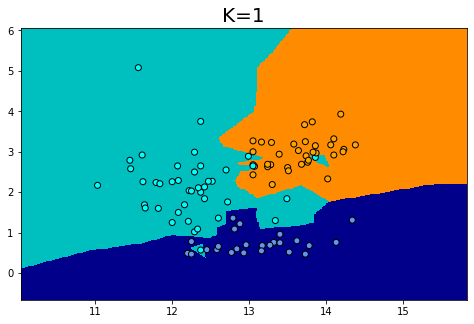

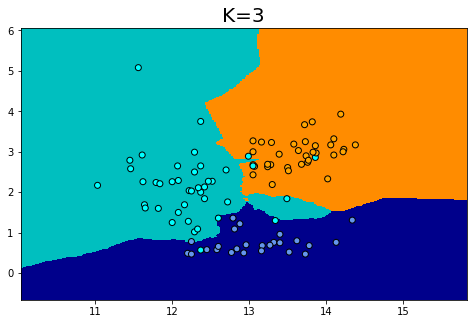

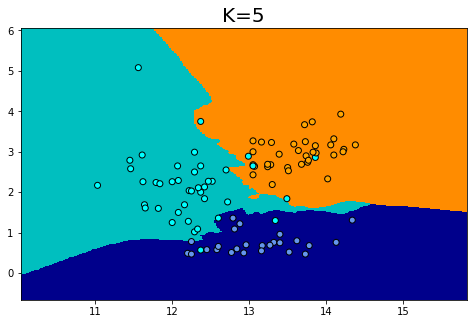

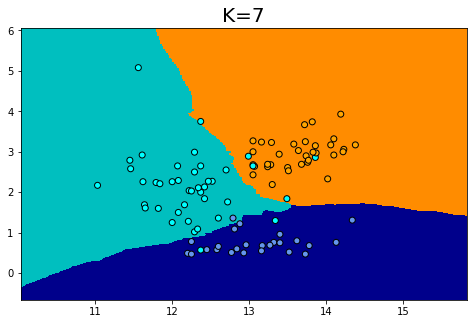

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
K = [1,3,5,7]
best_k = 0
best_acc = 0
accuracies = []
for k in K:
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.title(f"K={k}",fontsize=20)
    knn =  KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    predicted = knn.predict(X_val)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_bold)
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolor='k',cmap=cmap_light)
    acc = accuracy_score(predicted,y_val)
    if acc > best_acc:
        best_k = k
        best_acc = acc
    print(f"K = {k}: {acc}")
    accuracies.append(acc)

Text(0, 0.5, 'accuracy')

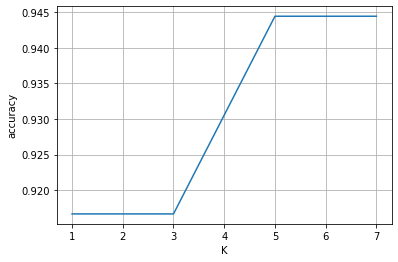

In [4]:
#Plot a graph showing how the accuracy on the validation set varies when changing K
plt.plot(K,accuracies)
plt.grid()
plt.xlabel("K")
plt.ylabel("accuracy")

In [5]:
knn =  KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_val,y_train_val)
predicted = knn.predict(X_test)
print(accuracy_score(predicted,y_test))

0.8703703703703703


# Linear SVM

C = 0.001: 0.3888888888888889
C = 0.01: 0.5833333333333334
C = 0.1: 0.8333333333333334
C = 1: 0.9444444444444444
C = 10: 0.9444444444444444
C = 100: 0.9166666666666666


c:\users\macco\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C = 1000: 0.9166666666666666


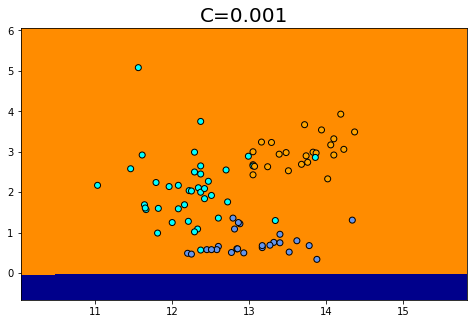

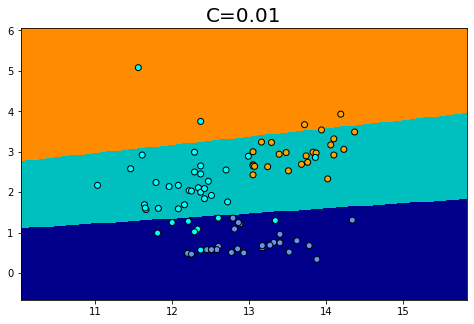

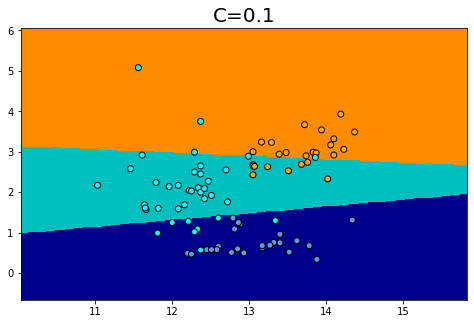

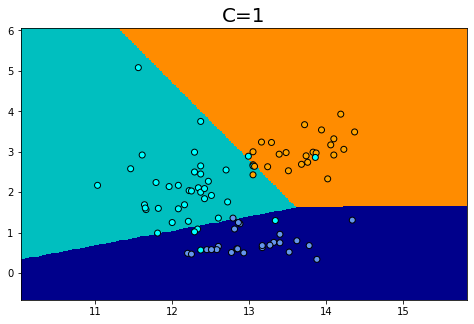

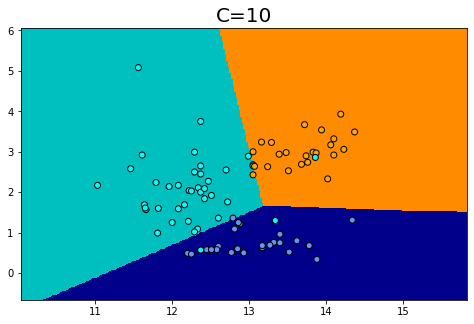

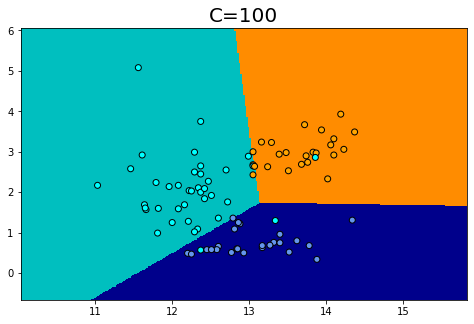

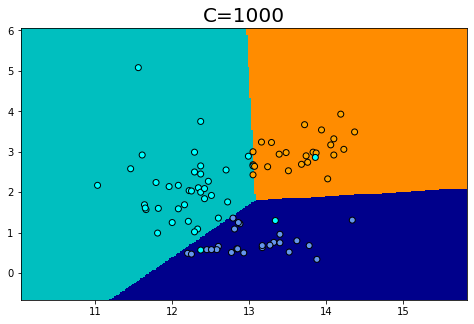

In [6]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]
best_c = 0
best_acc = 0
accuracies = []
for c in C:
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.title(f"C={c}",fontsize=20)
    svc = LinearSVC(C=c,max_iter=1000000,random_state=12)
    svc.fit(X_train,y_train)
    predicted = svc.predict(X_val)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_bold)
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolor='k',cmap=cmap_light)
    acc = accuracy_score(predicted,y_val)
    if acc > best_acc:
        best_c = c
        best_acc = acc
    print(f"C = {c}: {acc}")
    accuracies.append(acc)

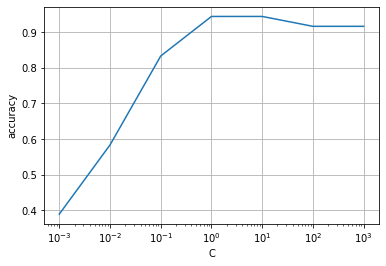

In [7]:
plt.plot(C,accuracies)
plt.grid()
plt.xlabel("C")
plt.ylabel("accuracy")
plt.xscale("log")

In [8]:
svc =  LinearSVC(C=best_c,max_iter=1000000)
svc.fit(X_train_val,y_train_val)
predicted = svc.predict(X_test)
print(accuracy_score(predicted,y_test))

0.9259259259259259


# RBF Kernel

C = 0.001: 0.3888888888888889


c:\users\macco\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\macco\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C = 0.01: 0.3888888888888889
C = 0.1: 0.9722222222222222


c:\users\macco\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\macco\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C = 1: 0.9444444444444444
C = 10: 0.8888888888888888


c:\users\macco\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\macco\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C = 100: 0.8888888888888888
C = 1000: 0.8888888888888888


c:\users\macco\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


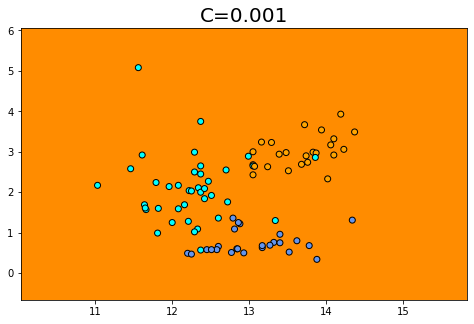

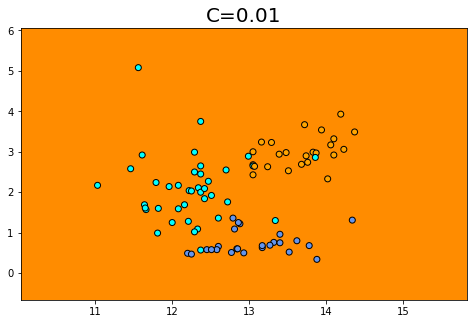

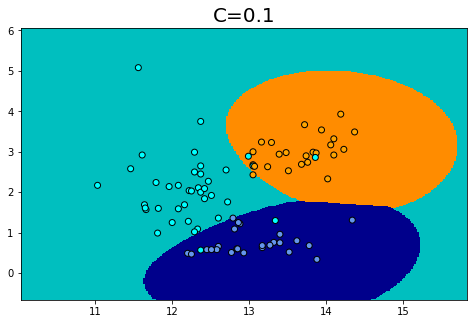

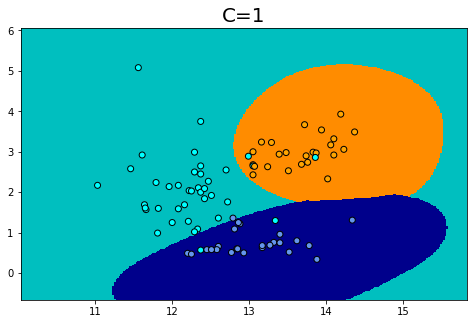

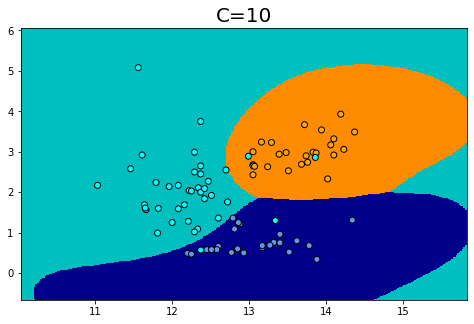

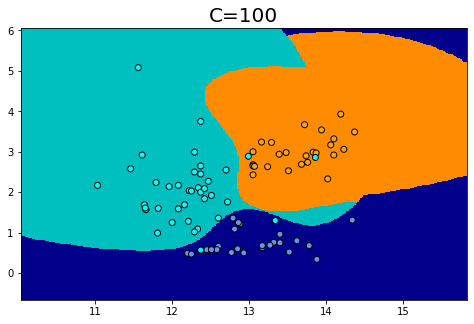

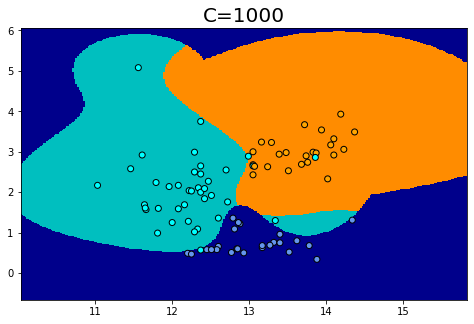

In [9]:
from sklearn.svm import SVC
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]
best_c = 0
best_acc = 0
accuracies = []
for c in C:
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.title(f"C={c}",fontsize=20)
    svc = SVC(C=c,kernel = 'rbf',random_state=12)
    svc.fit(X_train,y_train)
    predicted = svc.predict(X_val)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_bold)
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolor='k',cmap=cmap_light)
    acc = accuracy_score(predicted,y_val)
    if acc >= best_acc:
        best_c = c
        best_acc = acc
    print(f"C = {c}: {acc}")
    accuracies.append(acc)

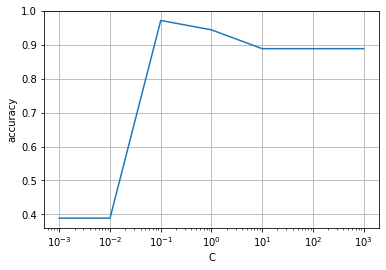

In [10]:
plt.plot(C,accuracies)
plt.grid()
plt.xlabel("C")
plt.ylabel("accuracy")
plt.xscale("log")

In [11]:
svc = SVC(C=best_c,kernel='rbf')
svc.fit(X_train_val,y_train_val)
predicted = svc.predict(X_test)
print(accuracy_score(predicted,y_test))

0.9259259259259259


c:\users\macco\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
from sklearn.model_selection import ParameterGrid
best_conf = {}
best_acc = 0
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100,1000],'kernel':['rbf'],'gamma':[0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1]}
for configuration in ParameterGrid(parameters):
    svc = SVC(**configuration,random_state=12)
    svc.fit(X_train,y_train)
    predicted = svc.predict(X_val)
    acc = accuracy_score(predicted,y_val)
    print(f"{configuration}-> accuracy = {acc}")
    if acc>best_acc:
        best_acc = acc
        best_conf = configuration

{'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.001, 'gamma': 0.005, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.001, 'gamma': 0.05, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.01, 'gamma': 0.005, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{'C': 0.01, 'gamma': 0.05, 'kernel': 'rbf'}-> accuracy = 0.3888888888888889
{

In [13]:
print(f"{best_acc},{best_conf}")

0.9722222222222222,{'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}


0.9259259259259259


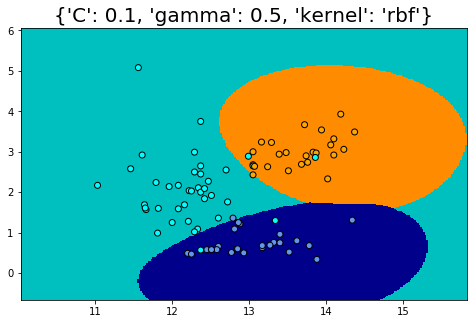

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title(f"{best_conf}",fontsize=20)
svc = SVC(**best_conf)
svc.fit(X_train_val,y_train_val)
predicted = svc.predict(X_test)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=cmap_bold)
ax.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolor='k',cmap=cmap_light)
acc = accuracy_score(predicted,y_test)
print(acc)

# K-Fold

In [15]:
from sklearn.model_selection import KFold
best_acc = 0
best_conf = {}
kf = KFold(n_splits=5)
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100,1000],'kernel':['rbf'],'gamma':[0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,1]}
for configuration in ParameterGrid(parameters):
    accuracies = []
    for train_index, test_index in kf.split(X_train_val):
        X_train, X_val = X_train_val[train_index], X_train_val[test_index]
        y_train, y_val = y_train_val[train_index], y_train_val[test_index]
        
        svc = SVC(**configuration)
        svc.fit(X_train,y_train)
        predicted = svc.predict(X_val)
        acc = accuracy_score(predicted,y_val)
        accuracies.append(acc)
    #print(f"{configuration}-> accuracy = {np.average(accuracies)}")
    if np.average(accuracies)>best_acc:
        best_acc = np.average(accuracies)
        best_conf = configuration

In [16]:
print(f"{best_acc},{best_conf}")

0.9359999999999999,{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [17]:
svc = SVC(**best_conf)
svc.fit(X_train_val,y_train_val)
predicted = svc.predict(X_test)
acc = accuracy_score(predicted,y_test)
print(acc)

0.9444444444444444
